# Application

## Imports

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np

%run 'library.ipynb'

## Load raw data

In [2]:
# cholorophyll
chl_95_0m = load_data("bgc", "chl", 1995, 1995, 0)
chl_95_200m = load_data("bgc", "chl", 1995, 1995, 200)
chl_96_0m = load_data("bgc", "chl", 1996, 1996, 0)
chl_96_200m = load_data("bgc", "chl", 1996, 1996, 200)

# iron
fe_95_0m = load_data("bgc", "fe", 1995, 1995, 00)
fe_95_200m = load_data("bgc", "fe", 1995, 1995, 100)
fe_96_0m = load_data("bgc", "fe", 1996, 1996, 0)
fe_96_200m = load_data("bgc", "fe", 1996, 1996, 100)

# mixed layer depth
mlotst_95 = load_data("phy", "mlotst", 1995, 1995, 20)
mlotst_96 = load_data("phy", "mlotst", 1996, 1996, 20)

## Analysis

In [3]:
# time averages of chlorophyll
chl_0m_concat_ = xr.concat([chl_95_0m, chl_96_0m], dim="time")
chl_0m_mean = chl_0m_concat_.mean("time")
chl_200m_concat_ = xr.concat([chl_95_200m, chl_96_200m], dim="time")
chl_200m_mean = chl_0m_concat_.mean("time")

# standard deviations of iron
fe_0m_concat_ = xr.concat([fe_95_0m, fe_96_0m], dim="time")
fe_0m_std = fe_0m_concat_.std("time")
fe_200m_concat = xr.concat([fe_95_200m, fe_96_200m], dim="time")
fe_200m_std = fe_200m_concat.std("time")

# Covariance of deep and shallow chlorophyll and mixed layer depth 
chl_0m_mld_cov = (
    (chl_0m_concat_ - chl_0m_concat_.mean("time")) 
    * (xr.concat([mlotst_95, mlotst_96], dim="time") - xr.concat([mlotst_95, mlotst_96], dim="time").mean("time"))
).mean("time")
chl_200m_mld_cov = (
    (chl_200m_concat_ - chl_200m_concat_.mean("time")) 
    * (xr.concat([mlotst_95, mlotst_96], dim="time") - xr.concat([mlotst_95, mlotst_96], dim="time").mean("time"))
).mean("time")

## Investigate value ranges

In [4]:
print(chl_0m_mean.quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'chl' (quantile: 21)> Size: 168B
array([9.31604672e-03, 5.65362833e-02, 6.53133988e-02, 7.34405525e-02,
       8.22299078e-02, 9.03081391e-02, 1.04626067e-01, 1.22059058e-01,
       1.39953783e-01, 1.59692322e-01, 1.84091680e-01, 2.12055006e-01,
       2.44265711e-01, 2.78370102e-01, 3.03904122e-01, 3.13958846e-01,
       3.29748482e-01, 3.54260406e-01, 3.95818561e-01, 5.01912603e-01,
       9.70186806e+00])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [5]:
print(chl_200m_mean.quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'chl' (quantile: 21)> Size: 168B
array([9.31604672e-03, 5.65362833e-02, 6.53133988e-02, 7.34405525e-02,
       8.22299078e-02, 9.03081391e-02, 1.04626067e-01, 1.22059058e-01,
       1.39953783e-01, 1.59692322e-01, 1.84091680e-01, 2.12055006e-01,
       2.44265711e-01, 2.78370102e-01, 3.03904122e-01, 3.13958846e-01,
       3.29748482e-01, 3.54260406e-01, 3.95818561e-01, 5.01912603e-01,
       9.70186806e+00])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [6]:
print(fe_0m_std.quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'fe' (quantile: 21)> Size: 168B
array([4.41247483e-09, 1.14595080e-06, 3.88965532e-06, 6.87706815e-06,
       1.02633590e-05, 1.48123870e-05, 2.09277077e-05, 2.84597547e-05,
       3.75368203e-05, 4.71098665e-05, 5.84696772e-05, 7.31520136e-05,
       8.92114535e-05, 1.08070202e-04, 1.31704804e-04, 1.62398719e-04,
       2.02305461e-04, 2.66524607e-04, 3.67098083e-04, 5.52219828e-04,
       2.34213620e-02])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [7]:
print(fe_200m_std.quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'fe' (quantile: 21)> Size: 168B
array([2.45631493e-09, 9.01714986e-07, 3.46195984e-06, 6.22602979e-06,
       9.53437120e-06, 1.37372417e-05, 1.89530772e-05, 2.51235622e-05,
       3.20648040e-05, 3.92107064e-05, 4.68537946e-05, 5.60750101e-05,
       6.85792853e-05, 8.28068230e-05, 1.00743903e-04, 1.22979116e-04,
       1.48789826e-04, 1.80837449e-04, 2.31376325e-04, 3.22718555e-04,
       1.85787468e-03])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [8]:
print(chl_0m_mld_cov.quantile(np.linspace(0, 1, 21)))

<xarray.DataArray (quantile: 21)> Size: 168B
array([-1.83326553e+02, -5.68027778e+00, -2.98785880e+00, -1.51182978e+00,
       -7.78083813e-01, -4.24248829e-01, -2.62193602e-01, -1.69428943e-01,
       -1.02432545e-01, -5.73099690e-02, -2.21556025e-02,  7.47876959e-03,
        5.21676399e-02,  1.33757834e-01,  2.77406046e-01,  4.77755003e-01,
        7.20455921e-01,  1.08169779e+00,  1.66543200e+00,  2.98146979e+00,
        7.36242447e+01])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [9]:
print(chl_200m_mld_cov.quantile(np.linspace(0, 1, 21)))

<xarray.DataArray (quantile: 21)> Size: 168B
array([-9.44508076e+00, -2.06731239e-01, -8.06678206e-02, -3.94829296e-02,
       -2.13636115e-02, -1.24542783e-02, -7.31436061e-03, -4.24825656e-03,
       -2.34096614e-03, -1.00930404e-03,  2.22866816e-04,  2.27683000e-03,
        6.06769174e-03,  1.27727010e-02,  2.35209376e-02,  4.03852593e-02,
        6.81524396e-02,  1.42474377e-01,  8.93062961e-01,  2.65008626e+00,
        1.87337456e+01])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


## Visualize

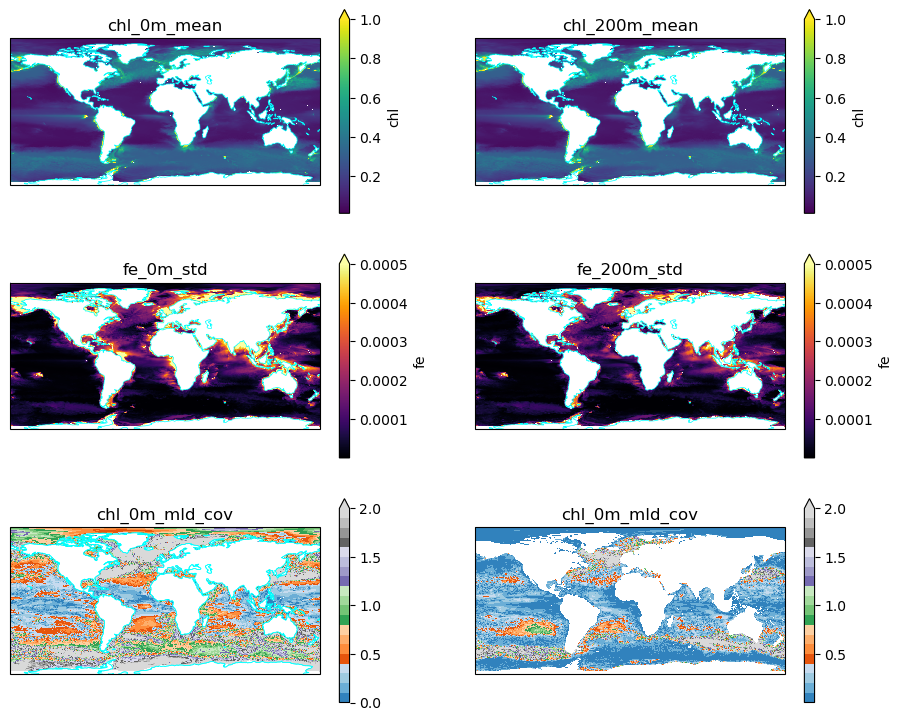

In [10]:
fig, axs = plt.subplots(3, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (11, 9))

chl_0m_mean.plot(vmax=1.0, x="longitude", y="latitude", ax=axs[0, 0], transform=ccrs.PlateCarree())
axs[0, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[0, 0].set_title("chl_0m_mean")

chl_200m_mean.plot(vmax=1.0, x="longitude", y="latitude", ax=axs[0, 1], transform=ccrs.PlateCarree())
axs[0, 1].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[0, 1].set_title("chl_200m_mean")

fe_0m_std.plot(vmax=0.0005, cmap="inferno", x="longitude", y="latitude", ax=axs[1, 0], transform=ccrs.PlateCarree())
axs[1, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[1, 0].set_title("fe_0m_std")

fe_200m_std.plot(vmax=0.0005, cmap="inferno", x="longitude", y="latitude", ax=axs[1, 1], transform=ccrs.PlateCarree())
axs[1, 1].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[1, 1].set_title("fe_200m_std")

np.sqrt(abs(chl_0m_mld_cov)).plot(vmax=2.0, cmap="tab20c", x="longitude", y="latitude", ax=axs[2, 0], transform=ccrs.PlateCarree())
axs[2, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[2, 0].set_title("chl_0m_mld_cov")

np.sqrt(abs(chl_200m_mld_cov)).plot(vmax=2.0, cmap="tab20c", x="longitude", y="latitude", ax=axs[2, 1], transform=ccrs.PlateCarree())
axs[2, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[2, 1].set_title("chl_0m_mld_cov");